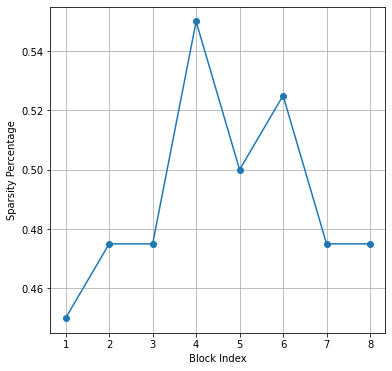

In [5]:
import matplotlib.pyplot as plt


data = {"0": 0.45, "1": 0.475, "2": 0.475, "3": 0.55, "4": 0.5, "5": 0.525, "6": 0.475, "7": 0.475}

keys = [int(key) + 1 for key in data.keys()]  # 将键转换为整数并加1，以匹配题目要求的Block index 1 to 8
values = list(data.values())

# 创建折线图
plt.figure(figsize=(6, 6))  # 可以调整图形的大小
plt.plot(keys, values, marker='o')  # 使用'o'作为标记点

# 设置图形的标题和轴标签
plt.grid(True)
plt.xlabel('Block Index')
plt.ylabel('Sparsity Percentage')
plt.savefig('sparsity_by_block.png', dpi=300)
# 显示图形
plt.show()

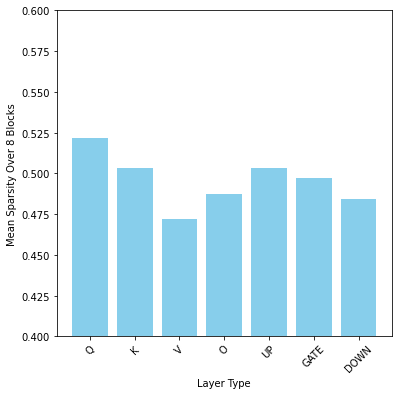

In [12]:
import matplotlib.pyplot as plt

# 给定的字典
data = {
    "0-self_attn.q_proj": 0.55, "0-self_attn.k_proj": 0.55, "0-self_attn.v_proj": 0.45, "0-self_attn.o_proj": 0.47500000000000003, "0-mlp.gate_proj": 0.5, "0-mlp.up_proj": 0.525, "0-mlp.down_proj": 0.5,
    "1-self_attn.q_proj": 0.45, "1-self_attn.k_proj": 0.47500000000000003, "1-self_attn.v_proj": 0.47500000000000003, "1-self_attn.o_proj": 0.47500000000000003, "1-mlp.gate_proj": 0.45, "1-mlp.up_proj": 0.5, "1-mlp.down_proj": 0.45,
    "2-self_attn.q_proj": 0.5, "2-self_attn.k_proj": 0.47500000000000003, "2-self_attn.v_proj": 0.5, "2-self_attn.o_proj": 0.47500000000000003, "2-mlp.gate_proj": 0.45, "2-mlp.up_proj": 0.47500000000000003, "2-mlp.down_proj": 0.5,
    "3-self_attn.q_proj": 0.55, "3-self_attn.k_proj": 0.525, "3-self_attn.v_proj": 0.5, "3-self_attn.o_proj": 0.5, "3-mlp.gate_proj": 0.55, "3-mlp.up_proj": 0.55, "3-mlp.down_proj": 0.47500000000000003,
    "4-self_attn.q_proj": 0.55, "4-self_attn.k_proj": 0.525, "4-self_attn.v_proj": 0.45, "4-self_attn.o_proj": 0.5, "4-mlp.gate_proj": 0.5, "4-mlp.up_proj": 0.47500000000000003, "4-mlp.down_proj": 0.45,
    "5-self_attn.q_proj": 0.55, "5-self_attn.k_proj": 0.5, "5-self_attn.v_proj": 0.47500000000000003, "5-self_attn.o_proj": 0.45, "5-mlp.gate_proj": 0.5, "5-mlp.up_proj": 0.5, "5-mlp.down_proj": 0.525,
    "6-self_attn.q_proj": 0.525, "6-self_attn.k_proj": 0.45, "6-self_attn.v_proj": 0.45, "6-self_attn.o_proj": 0.5, "6-mlp.gate_proj": 0.55, "6-mlp.up_proj": 0.5, "6-mlp.down_proj": 0.47500000000000003,
    "7-self_attn.q_proj": 0.5, "7-self_attn.k_proj": 0.525, "7-self_attn.v_proj": 0.47500000000000003, "7-self_attn.o_proj": 0.525, "7-mlp.gate_proj": 0.47500000000000003, "7-mlp.up_proj": 0.5, "7-mlp.down_proj": 0.5
}

# 初始化7个类别的总和字典
sums = {"Q": 0, "K": 0, "V": 0, "O": 0, "UP": 0, "GATE": 0, "DOWN": 0}
counts = {"Q": 0, "K": 0, "V": 0, "O": 0, "UP": 0, "GATE": 0, "DOWN": 0}

# 计算每个类别的总和
for key, value in data.items():
    if "q_proj" in key:
        sums["Q"] += value
        counts["Q"] += 1
    elif "k_proj" in key:
        sums["K"] += value
        counts["K"] += 1
    elif "v_proj" in key:
        sums["V"] += value
        counts["V"] += 1
    elif "o_proj" in key:
        sums["O"] += value
        counts["O"] += 1
    elif "up_proj" in key:
        sums["UP"] += value
        counts["UP"] += 1
    elif "gate_proj" in key:
        sums["GATE"] += value
        counts["GATE"] += 1
    elif "down_proj" in key:
        sums["DOWN"] += value
        counts["DOWN"] += 1

# 计算平均值
averages = {k: sums[k] / counts[k] for k in sums}

# 绘制条形图
plt.figure(figsize=(6, 6))
plt.bar(averages.keys(), averages.values(), color='skyblue')
plt.ylim(0.4, 0.6)
plt.xlabel('Layer Type')
plt.ylabel('Mean Sparsity Over 8 Blocks')
# plt.title('Mean Sparsity by Layer Type Across Blocks')
plt.xticks(rotation=45)  # 旋转x轴标签，以便更清楚地显示
plt.savefig('sparsity_by_type.png', dpi=300)
plt.show()